In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [4]:
ab = pd.read_csv('../data/medium/dC_01.csv', header=None).values[0]
bestKnow = pd.read_csv('../data/medium/Best_Know1Fxs.csv', header=None).values[0]
bestKnow = bestKnow[:100].astype(float)

In [4]:
D = 30
frequency = 1_000
max_times = len(ab)
total_generations = max_times * frequency + 1000

def fitness_func(indiv): return (indiv.data**2).sum()
def constraint_func(indiv, b): return -b + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)
opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency, callbacks=DynamicConstraint)
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'best': None}

A proper report should be shown here :)
Total time: 00:13


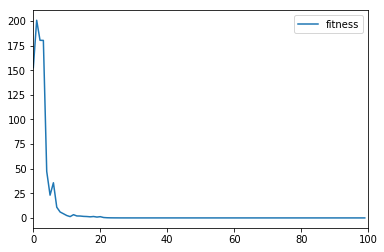

In [4]:
opt.run(total_generations)

In [5]:
# Multiple runs
runs = (Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                     max_times=max_times, frequency=frequency, callbacks=DynamicConstraint)
        .create_multiple_runs(n_runs=10))

In [6]:
runs.run(total_generations)

Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


In [7]:
runs.times_data

,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,run_10
0,1.684813e+02,1.439872e+02,8.861276e+01,1.853152e+02,1.435832e+02,1.792166e+02,1.199525e+02,1.323924e+02,1.805255e+02,2.150649e+02
1,1.242666e+02,1.277209e+02,1.497531e+02,1.538430e+02,2.100030e+02,2.137998e+02,1.222714e+02,1.084014e+02,1.823621e+02,1.578882e+02
2,1.666536e+02,1.945895e+02,1.394111e+02,1.551854e+02,1.566210e+02,1.697272e+02,1.481534e+02,1.023049e+02,1.914218e+02,1.836396e+02
3,1.300808e+02,1.257808e+02,1.525437e+02,1.433200e+02,1.892832e+02,1.534083e+02,1.495954e+02,8.111927e+01,2.135779e+02,1.600879e+02
4,9.102959e+01,6.136593e+01,8.820594e+01,8.304797e+01,8.514504e+01,1.073207e+02,7.519189e+01,4.523335e+01,6.850433e+01,7.814335e+01
5,2.890292e+01,5.121520e+01,4.376872e+01,3.324613e+01,3.905368e+01,2.868400e+01,3.948156e+01,3.926794e+01,1.747326e+01,3.411461e+01
6,1.820423e+01,4.670120e+01,5.568427e+01,3.401914e+01,3.598498e+01,3.316482e+01,6.551672e+01,4.941691e+01,5.550425e+01,3.917606e+01
7,1.167595e+01,1.669297e+01,2.062642e+01,2.513352e+01,2.064617e+01,2.114158e+01,2.408576e+01,2.314217e+01,1.637571e+01,2.599687e+01
8,6.876702e+00,1.516849e+01,5.721897e+00,1.056039e+01,1.961061e+01,1.225186e+01,1.584777e+01,1.099888e+01,3.201522e+00,8.051411e+00
9,4.706442e+00,4.666176e+00,5.302115e+00,5.391118e+00,3.756268e+00,7.016997e+00,6.778615e+00,7.352141e+00,1.889096e+00,4.369025e+00


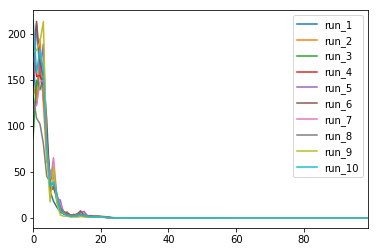

In [14]:
runs.times_data.plot();

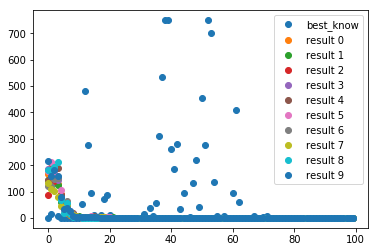

In [21]:
plt.plot(bestKnow, 'o', label='best_know')
for i,opt in enumerate(runs.optimizations):
    plt.plot(opt.recorder.best_times_fitness, 'o', label=f'result {i}')
plt.legend()